# 6.2 Exploring relationships

## This script contains the following:
#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships
2.1 Correlation Heatmap

2.2 Correlation heatmap using seaborn

2.3 Scatterplots

2.4 Pair Plots

2.5 Categorical Plots

#### 3. Answering the questions generated in the previous task
#### 4. Hypothesis

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Establishing a path
path = r'/Users/Kate/Documents/Chocolate Bar Ratings Analysis'

In [3]:
# Importing data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'chocolate_cleaned.csv'), index_col=0)

### 2. Exploring Relationships

2.1 Correlation Heatmap

In [4]:
# Create a correlation matrix using pandas

df.corr()

,Review Date,Rating
Review Date,1.000000,0.099846
Rating,0.099846,1.000000


In [5]:
df.head()

,Company,Review Date,Cocoa Percent,Company Location,Rating,Broad Origin
0,A. Morin,2016,63%,France,3.75,Sao Tome
1,A. Morin,2015,70%,France,2.75,Togo
2,A. Morin,2015,70%,France,3.00,Togo
3,A. Morin,2015,70%,France,3.50,Togo
4,A. Morin,2015,70%,France,3.50,Peru


In [6]:
#changing cocoa percent to float
df['Cocoa Percent'] = df['Cocoa Percent'].apply(lambda x: float(x.strip('%')) / 100.0)

In [7]:
df.head()

,Company,Review Date,Cocoa Percent,Company Location,Rating,Broad Origin
0,A. Morin,2016,0.63,France,3.75,Sao Tome
1,A. Morin,2015,0.70,France,2.75,Togo
2,A. Morin,2015,0.70,France,3.00,Togo
3,A. Morin,2015,0.70,France,3.50,Togo
4,A. Morin,2015,0.70,France,3.50,Peru


In [8]:
# Create a correlation matrix using pandas

df.corr()

,Review Date,Cocoa Percent,Rating
Review Date,1.000000,0.038177,0.099846
Cocoa Percent,0.038177,1.000000,-0.164820
Rating,0.099846,-0.164820,1.000000


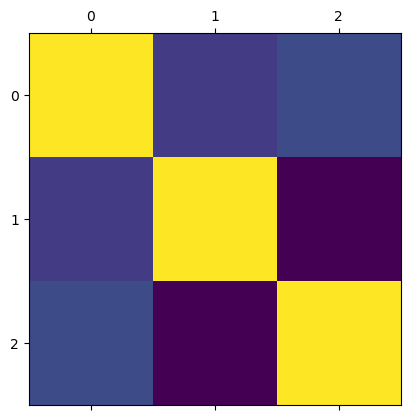

In [9]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

In [ ]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png") 

In [11]:
#current dir
cwd = os.getcwd()
cwd

'/Users/Kate/Documents/Chocolate Bar Ratings Analysis/03 Scripts'

2.2 Create a correlation heatmap using seaborn

In [12]:
df.columns

Index(['Company', 'Review Date', 'Cocoa Percent', 'Company Location', 'Rating',
       'Broad Origin'],
      dtype='object')

In [13]:
# Create a subset excluding unnecessary columns

sub = df[['Review Date', 'Cocoa Percent','Rating'
         ]]

In [14]:
sub

,Review Date,Cocoa Percent,Rating
0,2016,0.63,3.75
1,2015,0.70,2.75
2,2015,0.70,3.00
3,2015,0.70,3.50
4,2015,0.70,3.50
...,...,...,...
1790,2011,0.70,3.75
1791,2011,0.65,3.00
1792,2011,0.65,3.50
1793,2011,0.62,3.25


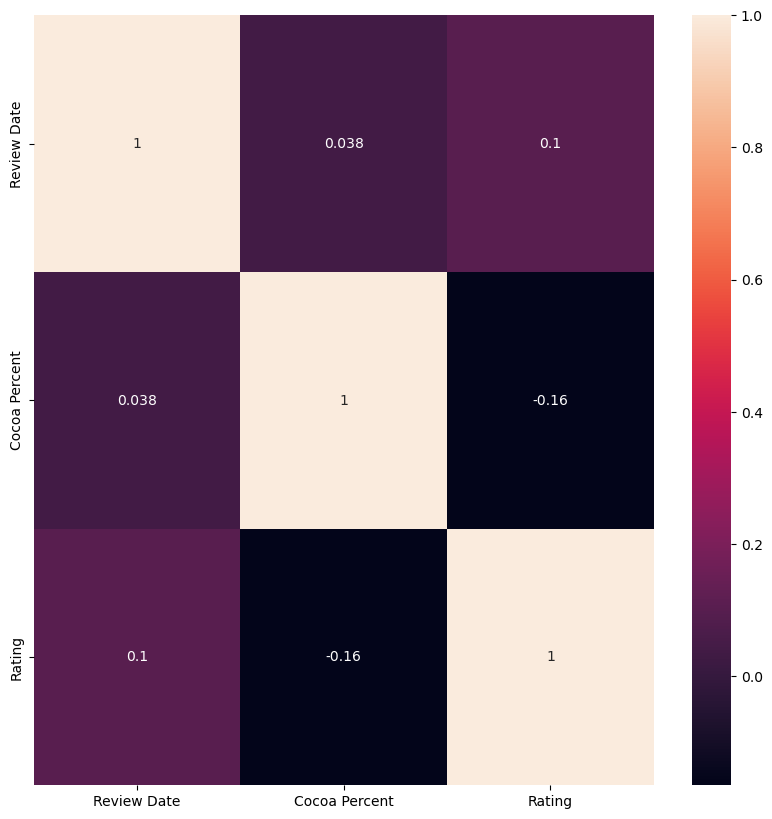

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [18]:
plt.savefig("correlation_heatmap.png")

<Figure size 640x480 with 0 Axes>

In [19]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

2.3 Scatterplots

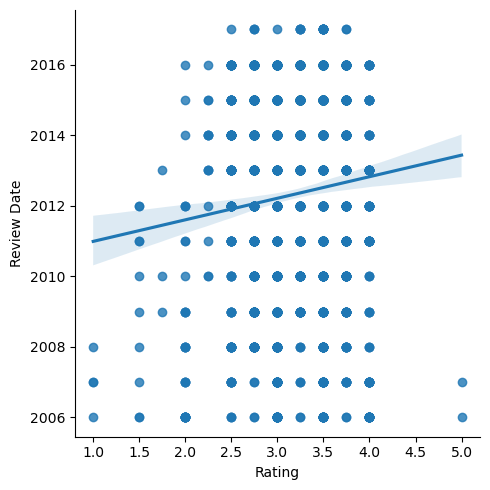

In [26]:
# Create a scatterplot for the "Rating" and "Review date" columns in seaborn

sns.lmplot(x = 'Rating', y = 'Review Date', data = df)

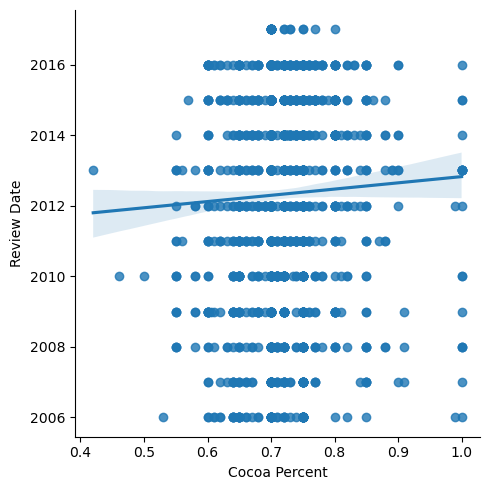

In [27]:
# Create a scatterplot for the "Cocoa Percent" and "Review date" columns in seaborn

sns.lmplot(x = 'Cocoa Percent', y = 'Review Date', data = df)

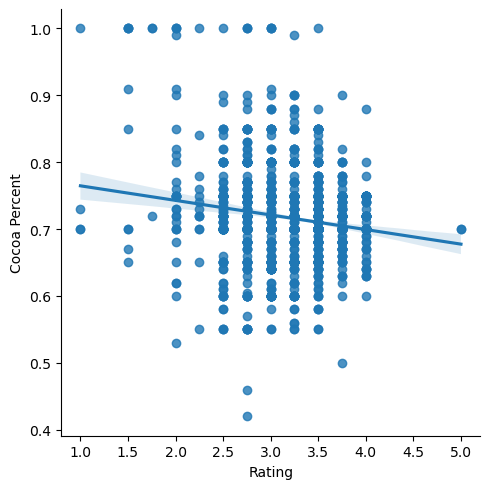

In [28]:
# Create a scatterplot for the "Rating" and "Cocoa Percent" columns in seaborn

sns.lmplot(x = 'Rating', y = 'Cocoa Percent', data = df)

2.4 Pair Plots

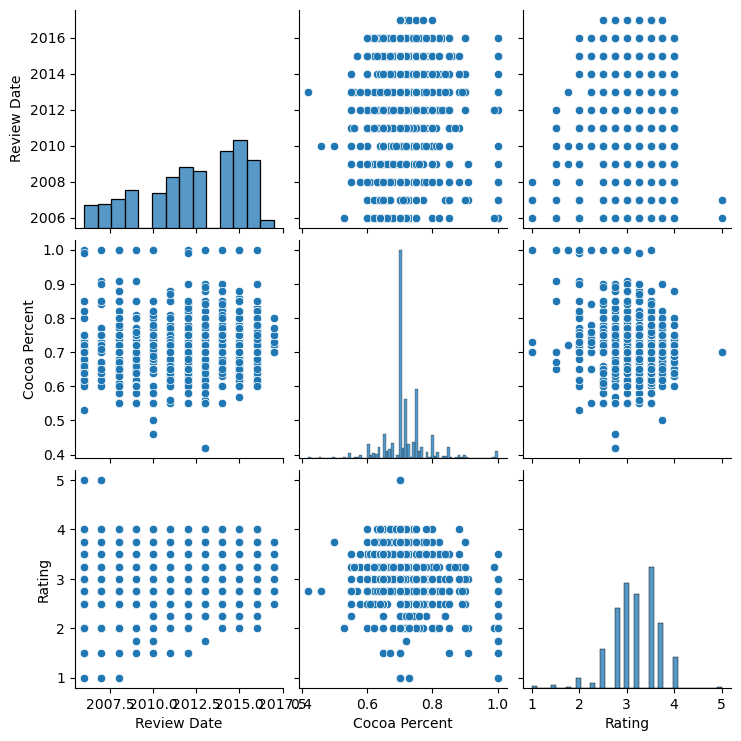

In [29]:
# Create a pair plot 

g = sns.pairplot(sub)

2.5 Categorical Plots

<AxesSubplot:xlabel='Cocoa Percent', ylabel='Count'>

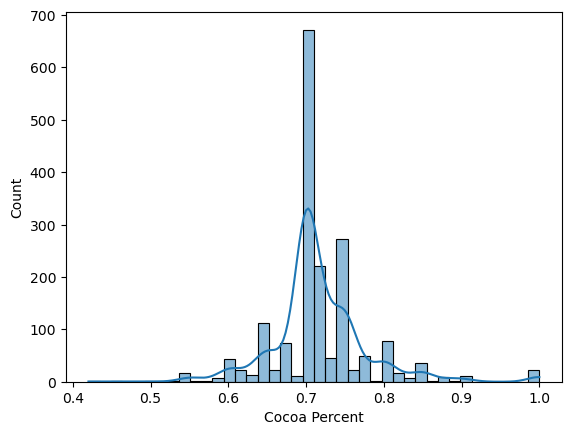

In [32]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the month ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Cocoa Percent'], bins = 40, kde = True)

In [34]:
df.loc[df['Cocoa Percent'] < 0.7, 'Cocoa category'] = 'Low Cocoa Mass'

In [35]:
df.loc[(df['Cocoa Percent'] >= 0.7) & (df['Cocoa Percent'] < 0.8), 'Cocoa category'] = 'Medium Cocoa Mass'

In [36]:
df.loc[df['Cocoa Percent'] >= 0.8, 'Cocoa category'] = 'High Cocoa Mass'

In [37]:
df['Cocoa Percent'].value_counts(dropna = False)

0.700    672
0.750    222
0.720    189
0.650     78
0.800     72
0.740     50
0.680     47
0.600     43
0.730     40
0.850     36
0.640     34
0.770     33
0.710     31
0.670     27
0.760     23
0.660     23
1.000     20
0.820     17
0.780     17
0.550     16
0.620     14
0.630     12
0.690     10
0.900      8
0.610      8
0.880      8
0.580      8
0.810      5
0.830      4
0.840      4
0.725      4
0.910      3
0.560      2
0.735      2
0.990      2
0.890      2
0.530      1
0.460      1
0.605      1
0.570      1
0.790      1
0.860      1
0.500      1
0.420      1
0.870      1
Name: Cocoa Percent, dtype: int64

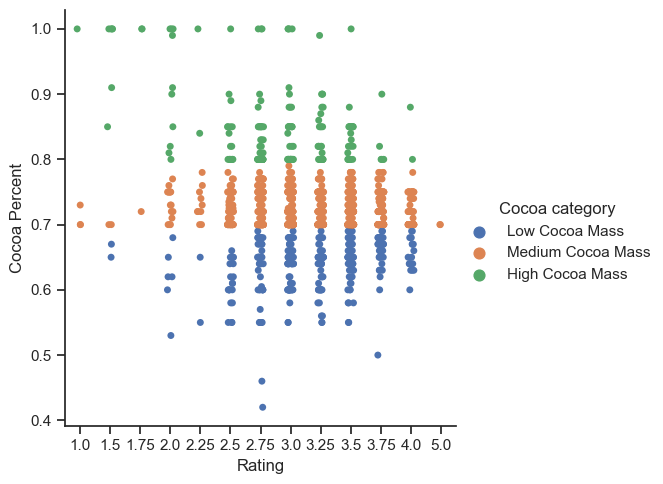

In [38]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Rating", y="Cocoa Percent", hue="Cocoa category", data=df)

In [39]:
# fig = g.get_figure()
g.savefig("out.png") 